# Approach word embeddings 

In this notebook, we apply spacy for the competition paraphrases texts 

In [ ]:
!pip install --upgrade gensim


In [3]:
# You first need to download the data:

!spacy download es_core_news_sm
 

     |████████████████████████████████| 16.2 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [1]:
#Then Restart the runtime, after which your code will run correctly:

import spacy
spacy.prefer_gpu()

nlp = spacy.load('es_core_news_sm')


In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

sst_home='drive/My Drive/Colab Notebooks/05-Modelo-WordEmbedding'
#replace this folder with the name of your folder in Google Colab, 
#where you are saving your notebooks of this course



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

train = pd.read_csv(sst_home+"/parmex_train.txt")
 
print('size of training dataset', len(train))

train.head()

size of training dataset 7601


,Text1,Text2,Label
0,"su nombre proviene de los persas, los cuales e...","el alimento, cuyo nombre proviene de los persa...",1
1,"la congelación con deshidratación, uno de los ...","un método de cocción es el sous vide, que mant...",0
2,"la empresa de catering caterers bubble, de lon...",el festival de alcachofa ahumada instantánea ...,0
3,el sous vide es un método de cocción que manti...,estos se usan para referir a las transformacio...,0
4,el cuidado de la piel también es un factor a t...,la dieta general de la gente consiste en carne...,0


In [4]:
X1_train=train['Text1'] #texts
X2_train=train['Text2'] #texts

y_train=train['Label'] #labels or classes

print(len(X1_train), len(X2_train), len(y_train))
 

7601 7601 7601


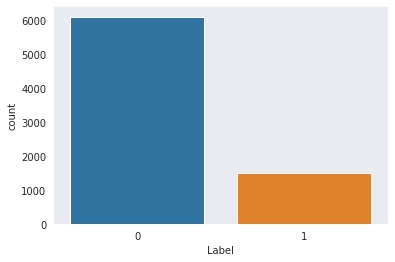

In [5]:
import seaborn as sns

sns.set_style("dark")

sns.countplot(x=y_train)             


# Dataset is not balanced !

In [6]:
# define training data
 
sentences1=[]
for text in X1_train: 
    doc = nlp(text)
    tokens=[]
    for token in doc:
        #if token.is_alpha:
        tokens.append(token.text.lower())
        #tokens.append(token.lemma_.lower())
    sentences1.append(tokens)


sentences2=[]
for text in X2_train: 
    doc = nlp(text)
    tokens=[]
    for token in doc:
        #if token.is_alpha:
        tokens.append(token.text.lower())
        #tokens.append(token.lemma_.lower())
    sentences2.append(tokens)



In [7]:
print(len(sentences1))

print(sentences1[0])

print(sentences1[10])


7601
['su', 'nombre', 'proviene', 'de', 'los', 'persas', ',', 'los', 'cuales', 'empleaban', 'este', 'alimento', 'para', 'dar', 'de', 'comer', 'a', 'sus', 'reyes', 'y', 'significa', '"', 'carne', 'a', 'la', 'parrilla', '"', '.']
['en', 'el', 'menú', 'hay', 'especialidades', 'como', 'el', 'festival', 'de', 'alcachofa', 'ahumada', 'instantánea', ',', 'hecha', 'de', 'diferentes', 'texturas', 'de', 'alcachofa', 'y', 'acompañada', 'por', 'una', 'microensalada', 'y', 'queso', 'parmesano', 'espolvoreado', 'con', 'oro', 'de', '24', 'quilates', ',', 'sobre', 'un', 'tazón', 'de', 'saturno', 'lleno', 'con', 'humo', 'de', 'nogal', '.']


In [8]:
print(len(sentences2))

print(sentences2[0])

print(sentences2[10])

7601
['el', 'alimento', ',', 'cuyo', 'nombre', 'proviene', 'de', 'los', 'persas', ',', 'que', 'significa', '“', 'carne', 'a', 'la', 'parrilla', '”', ',', 'se', 'empleaba', 'para', 'dar', 'de', 'comer', 'a', 'sus', 'reyes', '.']
['la', 'compañía', 'de', 'lóndres', ',', 'catering', 'caterers', 'bubble', ',', 'une', 'técnicas', 'moleculares', 'en', 'gran', 'parte', 'de', 'su', 'oferta', 'de', 'alimentos', '.']


In [13]:
from gensim.models import Word2Vec
import numpy as np 

# train model
#model = Word2Vec(sentences, min_count=2) 
#100-200-300, 30.
model = Word2Vec(np.concatenate((sentences1, sentences2), axis = 0), vector_size=100, min_count=2, epochs=100)#min_count=2, ignore all words with a frequency < 2
word_vectors = model.wv
print(model)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Word2Vec(vocab=3278, vector_size=100, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


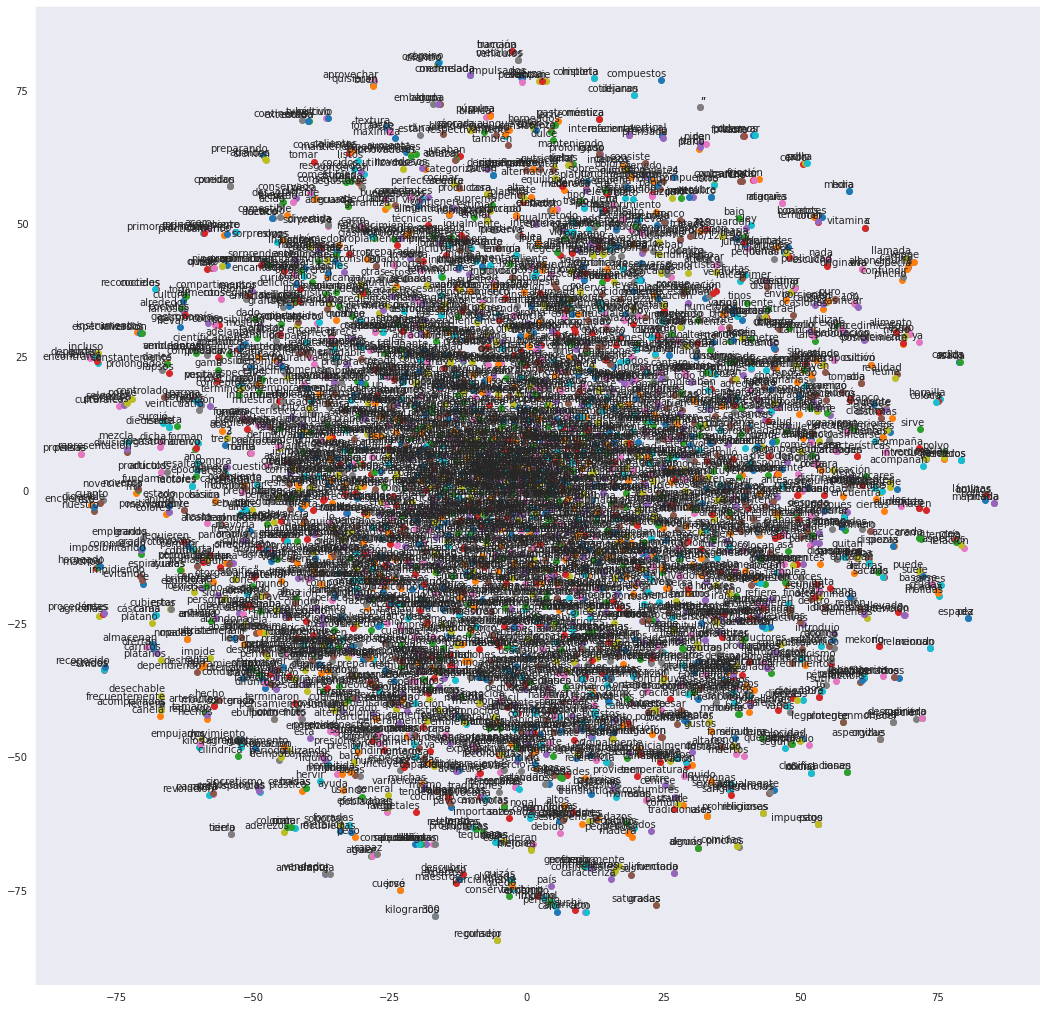

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(word_vectors):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    words=list(word_vectors.index_to_key)
    for word in words:
        tokens.append(word_vectors[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(word_vectors)

You can save the model. You can also load a pre-trained model.

In [ ]:
from gensim.models import KeyedVectors
word_vectors.save('model.bin')
word_vectors = KeyedVectors.load('model.bin')


In [16]:
print("vector de alimento:", word_vectors['alimento'])

vector de alimento: [-0.4086012   1.5933344  -3.5825615  -1.3105613   3.9165337  -3.245106
 -2.9484012  -0.7537304   0.3013633   5.084728    4.733763    8.108907
 -2.426688   -2.5866065  -3.2285142   3.5267959   3.554786   -0.4744554
 -2.3973267   2.1520061  -3.086136   -0.15503292 -0.2776893   2.4439628
 -0.48937404 -3.5461075   1.6774428  -1.7936659  -2.1891327   1.4471194
  1.3397455  -2.6008306  -0.02898232 -0.46981558  1.6333313   1.3945147
  3.704024   -0.9569522  -0.4469499  -3.6405923  -2.3616586   1.7172933
 -2.0972557  -0.69525987 -0.15505816  2.896903    2.2368834  -0.9964759
  0.5705576   0.27267957 -1.0674889  -1.3431666   4.2835956   3.32857
 -0.35168284 -0.9604924  -2.0749977   1.4456234   5.107843   -0.06997772
 -0.5303362  -5.5594244  -1.057272   -3.0073264  -0.9473994  -0.09292468
  3.0056589   1.0560722   2.242654   -0.53795934 -1.3758861  -5.117069
  2.431993    3.465485   -1.3157741  -0.625531    1.2155387   0.6750307
  1.2229431   1.5166341   3.6699598   2.5690224

In [17]:
print("vector de calor:", word_vectors['calor'])

vector de calor: [ 3.7255242  -7.7536283  -1.3710169  -0.8491579  -1.2161565   1.5085903
  2.4872322   3.864563   -2.3995013   3.3629642  -2.5086553   1.7945912
 -2.7051752  -0.953844   -2.3388863  -1.7742789  -1.5411383  -1.3228772
  5.426103    1.2493123   4.504698    2.4438803  -0.4781584   0.02444168
  6.423811    0.75504243 -0.15899444 -2.3008509  -3.8214993   2.1626453
 -5.1415763   1.7805889   3.7411351   3.256679    4.00618    -2.8729925
 -4.213097   -4.5133715   1.198701    2.6192834   6.098042    1.0284294
  2.0936663   1.7291297   6.699081   -2.1992521   0.9702451   0.52647924
 -4.084961   -1.7354493  -1.3832077   3.4697397  -0.85849404  1.6968747
  0.01319034 -1.2624453   1.4494267   1.598306    1.200879   -2.1971989
 -0.99147385  4.208965   -0.25355238 -3.0190516  -8.374649    3.4096324
  0.01916061 -3.6751788   2.933794    3.5705278   0.41685978  0.5838113
  4.073537   -3.586291    3.9124293   4.8568907  -3.1863465  -1.4580588
  0.9482544   0.3949936  -4.423598    4.20393

In [18]:
similarity = word_vectors.similarity('abierto', 'bastante')
print(similarity)

-0.06652157


In [19]:
similarity = word_vectors.similarity('calor', 'caliente')
print(similarity)

0.043243606


In [29]:
 
distance = word_vectors.wmdistance(sentences1[0], sentences2[0])
print(f"{distance:.4f}")


0.3713


In [35]:
# Sentence Similarity by using Word mover's distance (WMD)
# WMD is a method that allows us to assess the "distance" between two documents in a meaningful way, even when they have no words in common.

for i in range(10):
  distance = word_vectors.wmdistance(sentences1[i], sentences2[i])
  print('label',y_train[i], f"{distance:.4f}")

# Parece que las frases similares tienen una distancia inferior a 0.5 (distance<0.5, label 1)
# Sinon (distance>=0.5, label 0 )

label 1 0.3713
label 0 0.9523
label 0 0.9654
label 0 1.0062
label 0 0.9400
label 1 0.0461
label 0 0.9295
label 0 0.9413
label 0 1.1137
label 0 1.0363


In [36]:
#Compute cosine similarity between two sentences: n_similairity

for i in range(10):
  similarity = word_vectors.n_similarity(sentences1[i], sentences2[i])
  print('label',y_train[i], f"{similarity:.4f}")

# En este caso, las frases similares tienen una similitud que tiende a 1 (similitud>0.8, label 1)
# Sinon (distance<=0.8, label 0 )

label 1 0.9076
label 0 0.1966
label 0 0.4166
label 0 0.4212
label 0 0.3637
label 1 0.9932
label 0 0.4811
label 0 0.3751
label 0 0.1660
label 0 0.3786


## How to use a pre-trained word embedding model

In [ ]:
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data


[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
vector = word_vectors['mother']  # numpy vector of a word
print(vector.shape)

(100,)


In [ ]:
word_vectors.most_similar('aspirin')


[('ibuprofen', 0.8141189217567444),
 ('tamoxifen', 0.7157070636749268),
 ('pills', 0.7089155316352844),
 ('statins', 0.6964315176010132),
 ('medication', 0.6923385262489319),
 ('nsaids', 0.6912236213684082),
 ('medications', 0.6864854693412781),
 ('pill', 0.6833402514457703),
 ('antidepressants', 0.6831307411193848),
 ('acetaminophen', 0.6780716776847839)]

In [ ]:
word_vectors.most_similar('bad')


[('worse', 0.7929712533950806),
 ('good', 0.7702797651290894),
 ('things', 0.7653602957725525),
 ('too', 0.7630148530006409),
 ('thing', 0.7609668374061584),
 ('lot', 0.7443646788597107),
 ('kind', 0.7408681511878967),
 ('because', 0.7398799061775208),
 ('really', 0.7376540899276733),
 ("n't", 0.7336540818214417)]

In [ ]:
result = word_vectors.similar_by_word("mother") #cat
for r in result:
    print(r)

#most_similar_key, similarity = result[0]  # look at the first match
#print(f"{most_similar_key}: {similarity:.4f}")

('daughter', 0.9063109755516052)
('wife', 0.9025879502296448)
('grandmother', 0.8934443593025208)
('father', 0.8656660318374634)
('sister', 0.8647424578666687)
('husband', 0.8470974564552307)
('woman', 0.827568769454956)
('her', 0.8250683546066284)
('aunt', 0.8055843114852905)
('daughters', 0.7969927191734314)


In [ ]:
w1="media"
distance = word_vectors.distance(w1, w1)
print(f"{distance:.1f}")


0.0


In [ ]:
distance = word_vectors.distance("woman", "man")
similarity = word_vectors.similarity('woman', 'man')
print(f"{distance:.1f}",f"{similarity:.1f}")


0.2 0.8


In [ ]:
distance = word_vectors.distance("woman", "house")
similarity = word_vectors.similarity('woman', 'house')
print(f"{distance:.1f}",f"{similarity:.1f}")


0.5 0.5


In [ ]:
distance = word_vectors.distance("woman", "wife")
similarity = word_vectors.similarity('woman', 'wife')
print(f"{distance:.1f}",f"{similarity:.1f}")

0.2 0.8


In [ ]:
distance = word_vectors.distance("man", "husband")
similarity = word_vectors.similarity('man', 'husband')
print(f"{distance:.1f}",f"{similarity:.1f}")

0.3 0.7


In [ ]:
distance = word_vectors.distance("man", "cosine")
similarity = word_vectors.similarity('man', 'cosine')
print(f"{distance:.1f}",f"{similarity:.1f}")


1.1 -0.2


## doesnt_match

Which word from the given list doesn’t go with the others?


In [ ]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [ ]:
print(word_vectors.doesnt_match("car ship woman train".split()))

woman


## Sentence Similarity by using Word mover's distance (WMD)
WMD is a method that allows us to assess the "distance" between two documents in a meaningful way, even when they have no words in common.

The method also uses the bag-of-words representation of the documents (simply put, the word's frequencies in the documents), noted as  d  in the figure below. The intution behind the method is that we find the minimum "traveling distance" between documents, in other words the most efficient way to "move" the distribution of document 1 to the distribution of document 2.


https://markroxor.github.io/gensim/static/notebooks/WMD_tutorial.html

In [ ]:


sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()

sentence_president = 'The president greets the press in Chicago'.lower().split()
sentence_president3 = 'The president greets the media in Illinois'.lower().split()

distance = word_vectors.wmdistance(sentence_obama, sentence_president)
print(f"{distance:.4f}")

distance = word_vectors.wmdistance(sentence_obama, sentence_president3)
print(f"{distance:.4f}")

distance = word_vectors.wmdistance(sentence_president, sentence_president3)
print(f"{distance:.4f}")


0.6182
0.3908
0.2274


In [ ]:
text1 = 'The hotel was very expensive and not good'.lower().split()
text2 = 'The hotel was very good and not expensive'.lower().split()
text3 = 'The best result was achieved by BERT'.lower().split()

distance = word_vectors.wmdistance(text1, text2)
print(f"{distance:.4f}")

distance = word_vectors.wmdistance(text1, text3)
print(f"{distance:.4f}")

0.0000
0.6942


##  n_similarity
Compute cosine similarity between two sets of words.


In [ ]:
similarity = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print(f"{similarity:.4f}")

0.7067


In [ ]:
similarity = word_vectors.n_similarity(['blue', 'red'], ['japanese', 'restaurant'])
print(f"{similarity:.4f}")

0.4352


In [ ]:
similarity = word_vectors.n_similarity(['sushi', 'red'], ['blue', 'restaurant'])
print(f"{similarity:.4f}")

0.8065


Find the top-N most similar words, using the multiplicative combination objective proposed by Omer Levy and Yoav Goldberg in [R10], 3CosMu. 

Positive words still contribute positively towards the similarity, negative words negatively, but with less susceptibility to one large distance dominating the calculation.

In [ ]:
# Use a different similarity measure: "cosmul".
result = word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


queen: 0.8965


In [ ]:
result = word_vectors.most_similar_cosmul(positive=['madrid', 'france'], negative=['spain'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


paris: 0.9525


In [ ]:
result = word_vectors.most_similar_cosmul(positive=['baghdad', 'england'], negative=['london'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

iraq: 0.8781


In [ ]:
result = word_vectors.most_similar_cosmul(positive=['spain', 'barcelona'], negative=['madrid'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

portugal: 0.9031


In [ ]:
# Check the "most similar words", using the default "cosine similarity" measure.
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")


In [ ]:

tsne_plot(word_vectors)